In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

data = pd.read_csv("E:/大三/人工智能导论/finalwork/data/high_grandmaster_ranked_10min.csv")

#判断是否有缺失值、异常值
data.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [2]:
selected_variables = ["blueWins","redHeralds", "redDragons", "blueDragons", "blueHeralds", "blueEliteMonsters", "blueFirstBlood"]
data1 = data[selected_variables]

In [3]:
def calc_standardized_ratio(blue_data, red_data):
    #blue_data, red_data是两列数据，wins是蓝方胜利的一列数据
    ratio = (blue_data - red_data) / (blue_data + red_data)
    ratio = ratio.to_frame() #将series转换成dataframe
    #获取blue_data, red_data的列名
    blue_name = blue_data.name
    #将列名设置为blue_name中“blue”替换为“ratio”
    ratio.columns = [blue_name.replace('blue', 'ratio')]
    ratio = ratio.astype(float)  # 将数据类型转换为float
    #将ratio中的inf值替换为0
    ratio = ratio.replace([np.inf, -np.inf], 0)
    ratio = ratio.fillna(0)  # 将缺失值替换为0
    return ratio
ratio_Kills = calc_standardized_ratio(data['blueKills'], data['redKills'])
ratio_Assists = calc_standardized_ratio(data['blueAssists'], data['redAssists'])
ratio_WardsPlaced = calc_standardized_ratio(data['blueWardsPlaced'], data['redWardsPlaced'])
ratio_WardsDestroyed = calc_standardized_ratio(data['blueWardsDestroyed'], data['redWardsDestroyed'])
ratio_TotalGold = calc_standardized_ratio(data['blueTotalGold'], data['redTotalGold'])
ratio_TotalExperience = calc_standardized_ratio(data['blueTotalExperience'], data['redTotalExperience'])
ratio_AvgLevel = calc_standardized_ratio(data['blueAvgLevel'], data['redAvgLevel'])
ratio_TotalJungleMinionsKilled = calc_standardized_ratio(data['blueTotalJungleMinionsKilled'], data['redTotalJungleMinionsKilled'])
ratio_TotalMinionsKilled = calc_standardized_ratio(data['blueTotalMinionsKilled'], data['redTotalMinionsKilled'])

data2 = pd.concat([ratio_Kills, ratio_Assists, ratio_WardsPlaced, ratio_WardsDestroyed, ratio_TotalGold, ratio_TotalExperience, ratio_AvgLevel, ratio_TotalJungleMinionsKilled, ratio_TotalMinionsKilled], axis=1)
data2.isna().sum()

ratioKills                       0
ratioAssists                     0
ratioWardsPlaced                 0
ratioWardsDestroyed              0
ratioTotalGold                   0
ratioTotalExperience             0
ratioAvgLevel                    0
ratioTotalJungleMinionsKilled    0
ratioTotalMinionsKilled          0
dtype: int64

In [4]:
#将data1和data2按列合并成data3
data3 = pd.concat([data1, data2], axis=1)

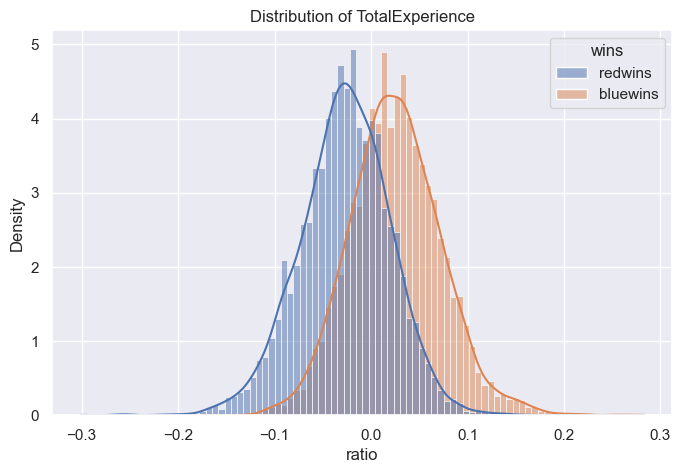

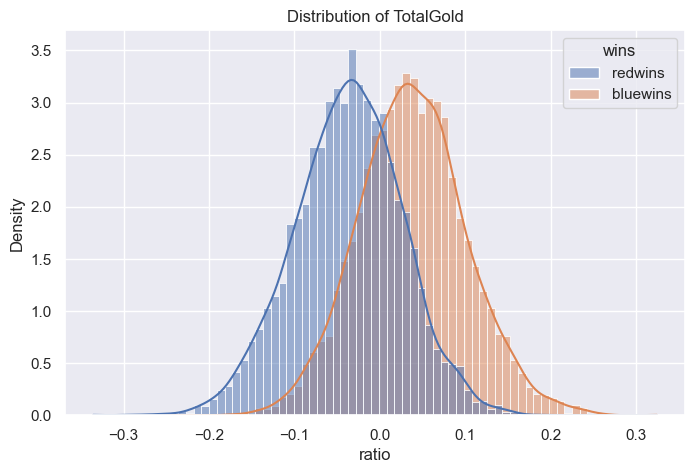

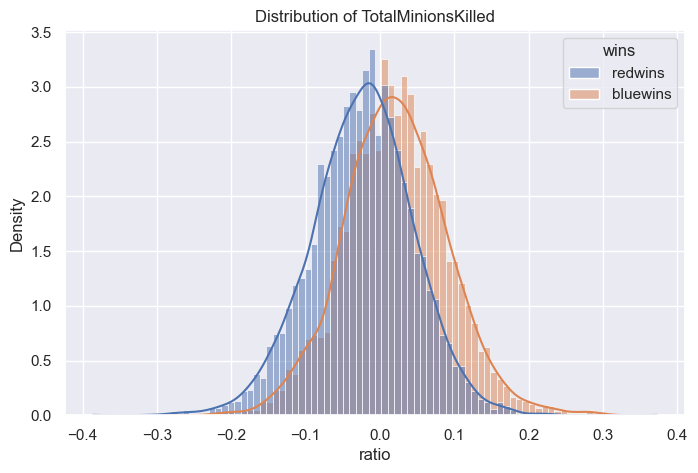

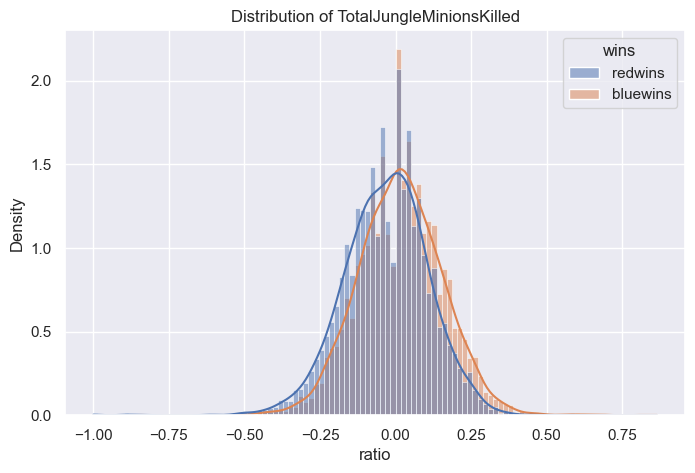

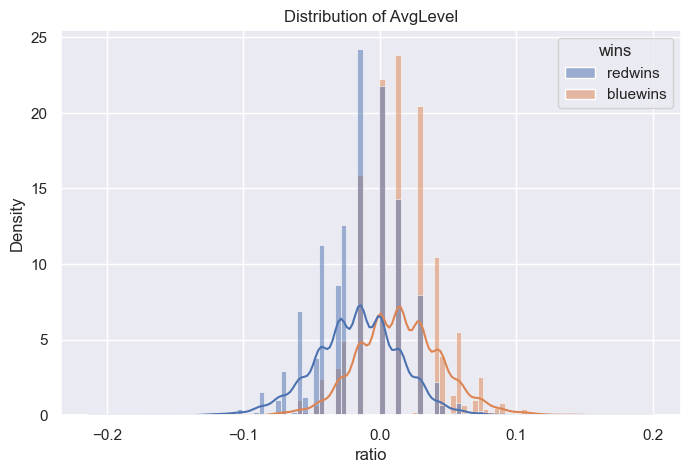

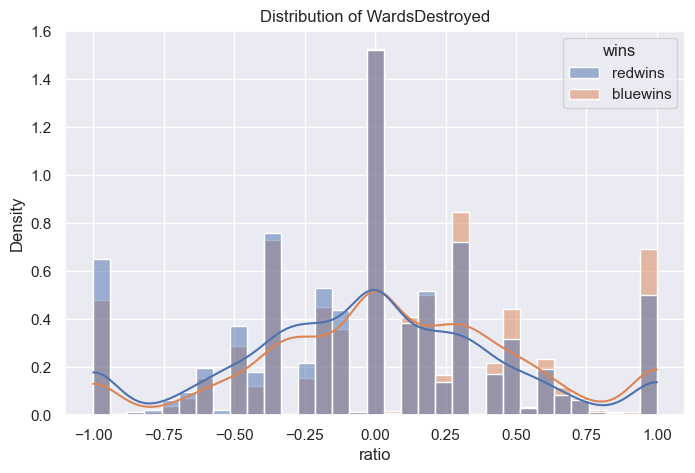

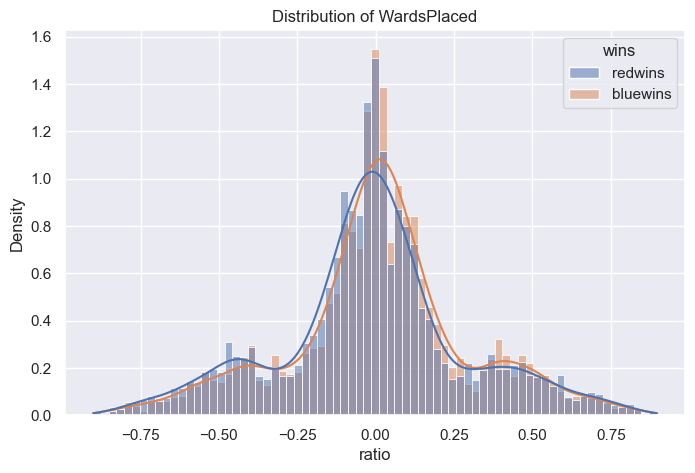

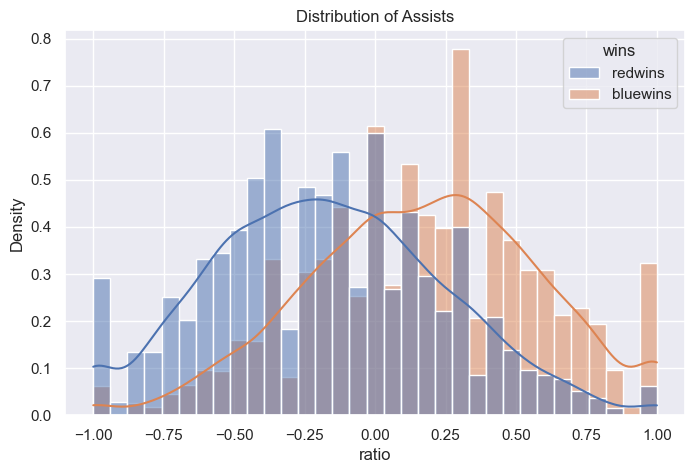

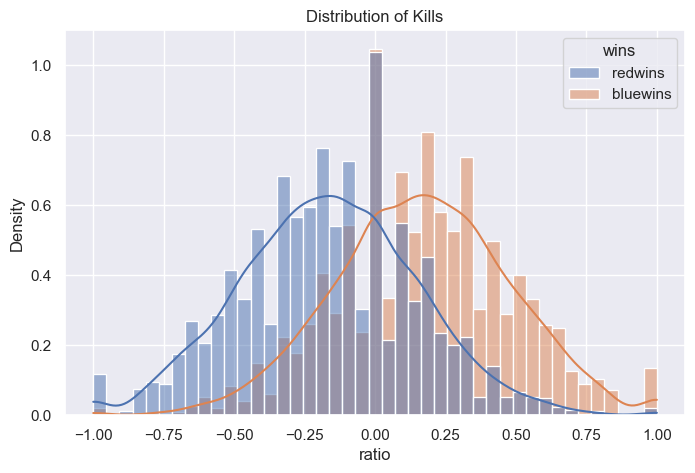

In [5]:
def plot_standardized_ratio(blue_data, red_data,bluewins):
    #blue_data, red_data是两列数据，wins是蓝方胜利的一列数据
    ratio = (blue_data - red_data) / (blue_data + red_data)
    ratio = ratio.to_frame() #将series转换成dataframe
    ratio.columns = ['ratio'] #将列命名为ratio
    #将bluewins中1和0分别替换成bluewins和redwins
    bluewins = bluewins.replace(0,'redwins')
    bluewins = bluewins.replace(1,'bluewins')
    bluewins = bluewins.to_frame() #将series转换成dataframe
    bluewins.columns = ['wins'] #将列命名为wins
    #将ratio和bluewins合并成一个dataframe
    ratio = pd.concat([ratio,bluewins],axis=1)
    plt.figure(figsize=(8, 5))
    sns.histplot(data=ratio,x="ratio",kde=True,stat="density", hue = "wins")
    #kde表示是否显示核密度估计图  hue表示按照blueWins分类  
    #添加标题 the distribution of + blue_data.name.replace('blue', '')
    plt.title('Distribution of ' + blue_data.name.replace('blue', ''))
    plt.show()



plot_standardized_ratio(data['blueTotalExperience'], data['redTotalExperience'],data['blueWins'])
plot_standardized_ratio(data['blueTotalGold'], data['redTotalGold'],data['blueWins'])
plot_standardized_ratio(data['blueTotalMinionsKilled'], data['redTotalMinionsKilled'],data['blueWins'])
plot_standardized_ratio(data['blueTotalJungleMinionsKilled'], data['redTotalJungleMinionsKilled'],data['blueWins'])
plot_standardized_ratio(data['blueAvgLevel'], data['redAvgLevel'],data['blueWins'])
plot_standardized_ratio(data['blueWardsDestroyed'], data['redWardsDestroyed'],data['blueWins'])
plot_standardized_ratio(data['blueWardsPlaced'], data['redWardsPlaced'],data['blueWins'])
plot_standardized_ratio(data['blueAssists'], data['redAssists'],data['blueWins'])
plot_standardized_ratio(data['blueKills'], data['redKills'],data['blueWins'])







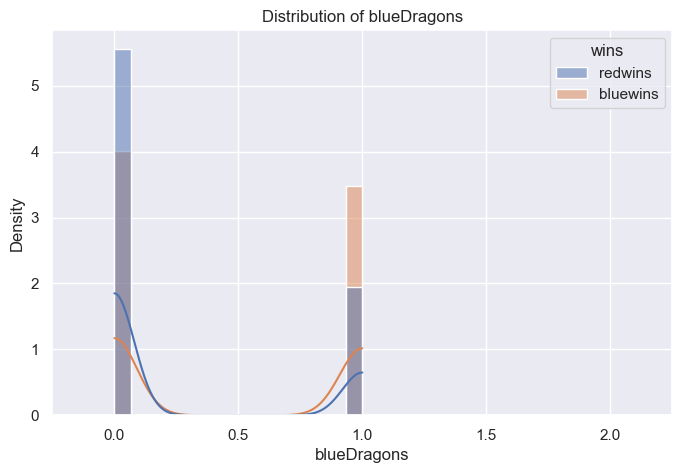

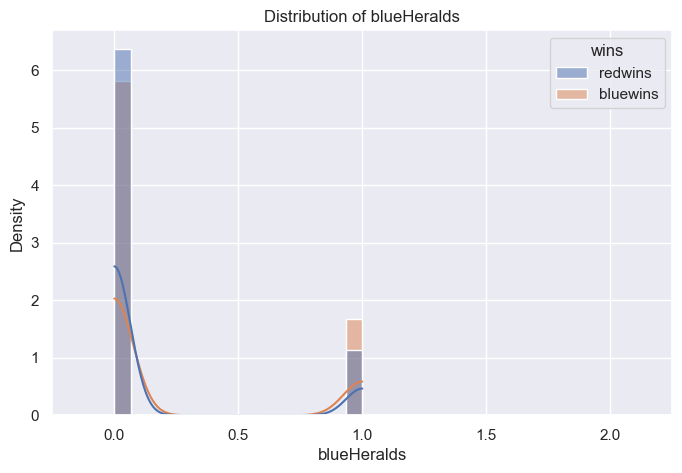

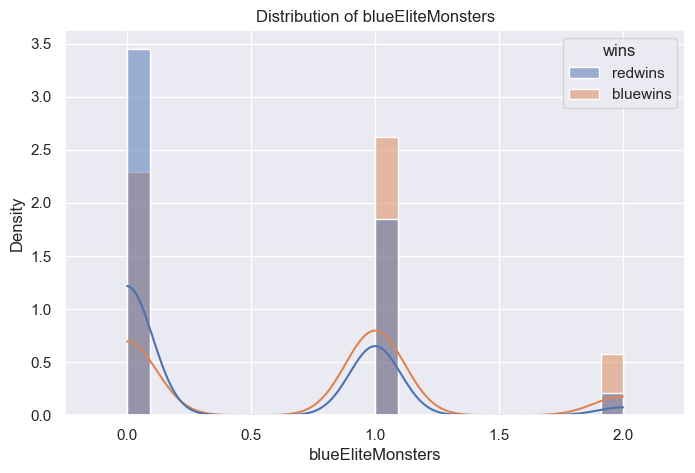

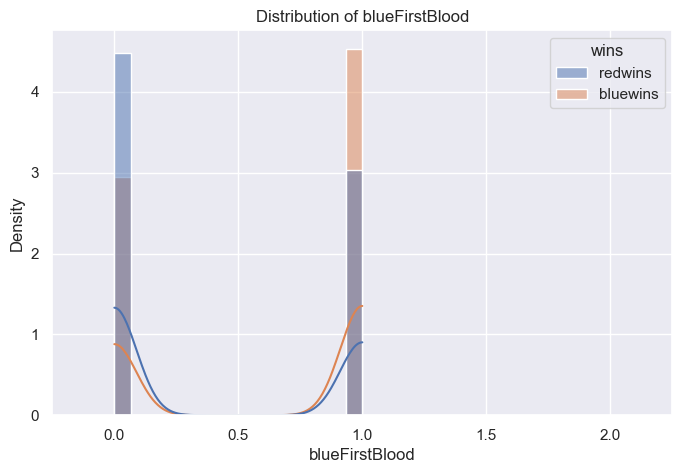

In [7]:
def plot_hist(data,bluewins):
    name= data.name
    data = data.to_frame() #将series转换成dataframe
    data.columns = ['data'] #将列命名为   
    #将bluewins中1和0分别替换成bluewins和redwins
    bluewins = bluewins.replace(0,'redwins')
    bluewins = bluewins.replace(1,'bluewins')
    bluewins = bluewins.to_frame() #将series转换成dataframe
    bluewins.columns = ['wins'] #将列命名为wins
    #将ratio和bluewins合并成一个dataframe
    data_wins = pd.concat([data,bluewins],axis=1)
    data0_wins=data_wins[data_wins['data']==0]
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data_wins,x="data",kde=True,stat="density", hue = "wins")
    # sns.histplot(data=data2_wins,x="data",kde=True,stat="density", hue = "wins")
    #核密度估计曲线只显示了一半，因为数据只有0和1，所以0左边的和1右边的都是0，应该怎么解决？
    plt.xlabel(name)
    plt.title('Distribution of ' + name)
    plt.xlim(-0.25, 1.25)
    plt.show()


plot_hist(data['blueDragons'],data['blueWins'])
plot_hist(data['blueHeralds'],data['blueWins'])
plot_hist(data['blueEliteMonsters'],data['blueWins'])
plot_hist(data['blueFirstBlood'],data['blueWins'])
plot_hist(data['redDragons'],data['blueWins'])
plot_hist(data['redHeralds'],data['blueWins'])
plot_hist(data['redEliteMonsters'],data['blueWins'])
plot_hist(data['redFirstBlood'],data['blueWins'])

<Axes: >

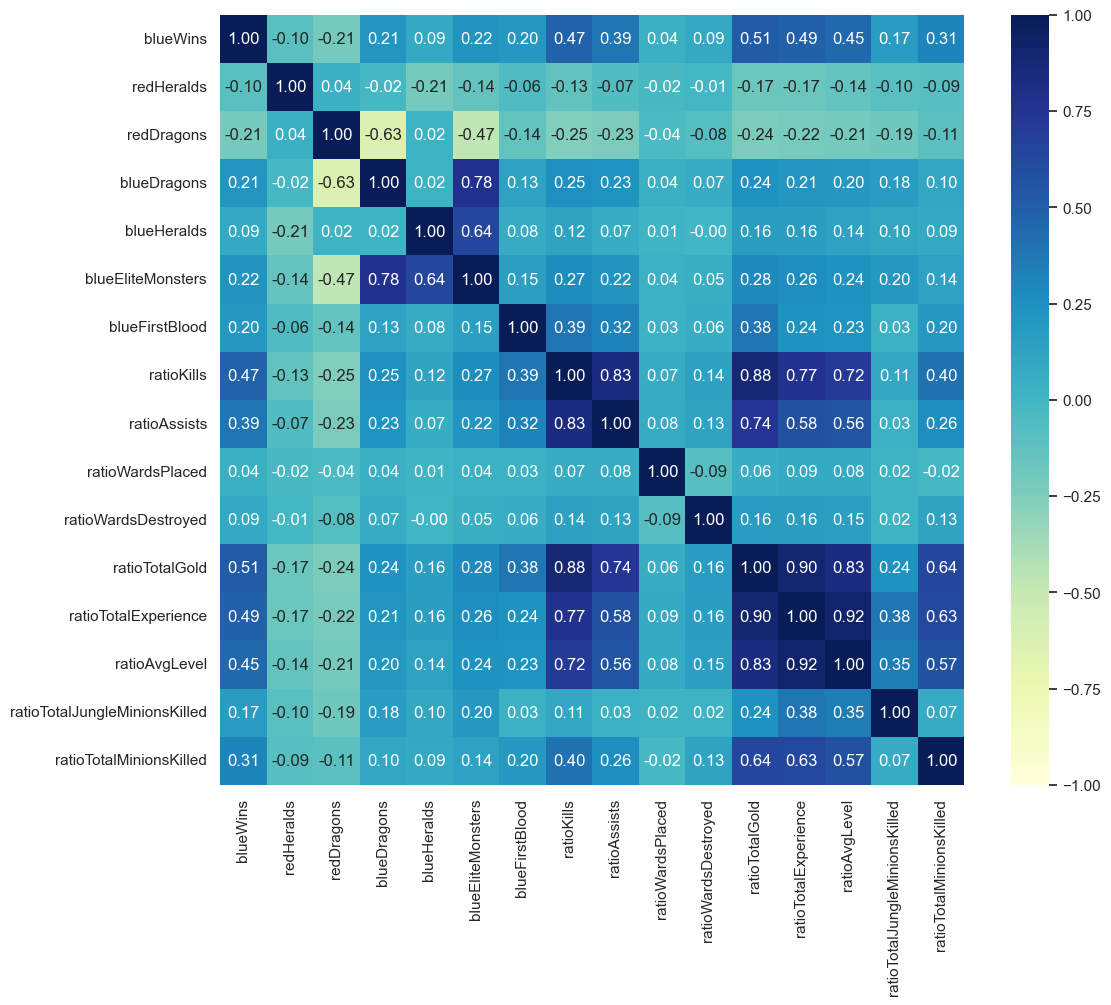

In [10]:
data3corr = data3.corr()

mp.pyplot.figure(figsize=(12, 10))
sns.heatmap(data3corr, vmin = -1, vmax = 1, fmt = ".2f", cmap='YlGnBu',annot = True)
#sns.heatmap(data3corr, vmin = -1, vmax = 1, fmt = ".2f",annot = True,cmap = sns.color_palette("RdBu", as_cmap = True))

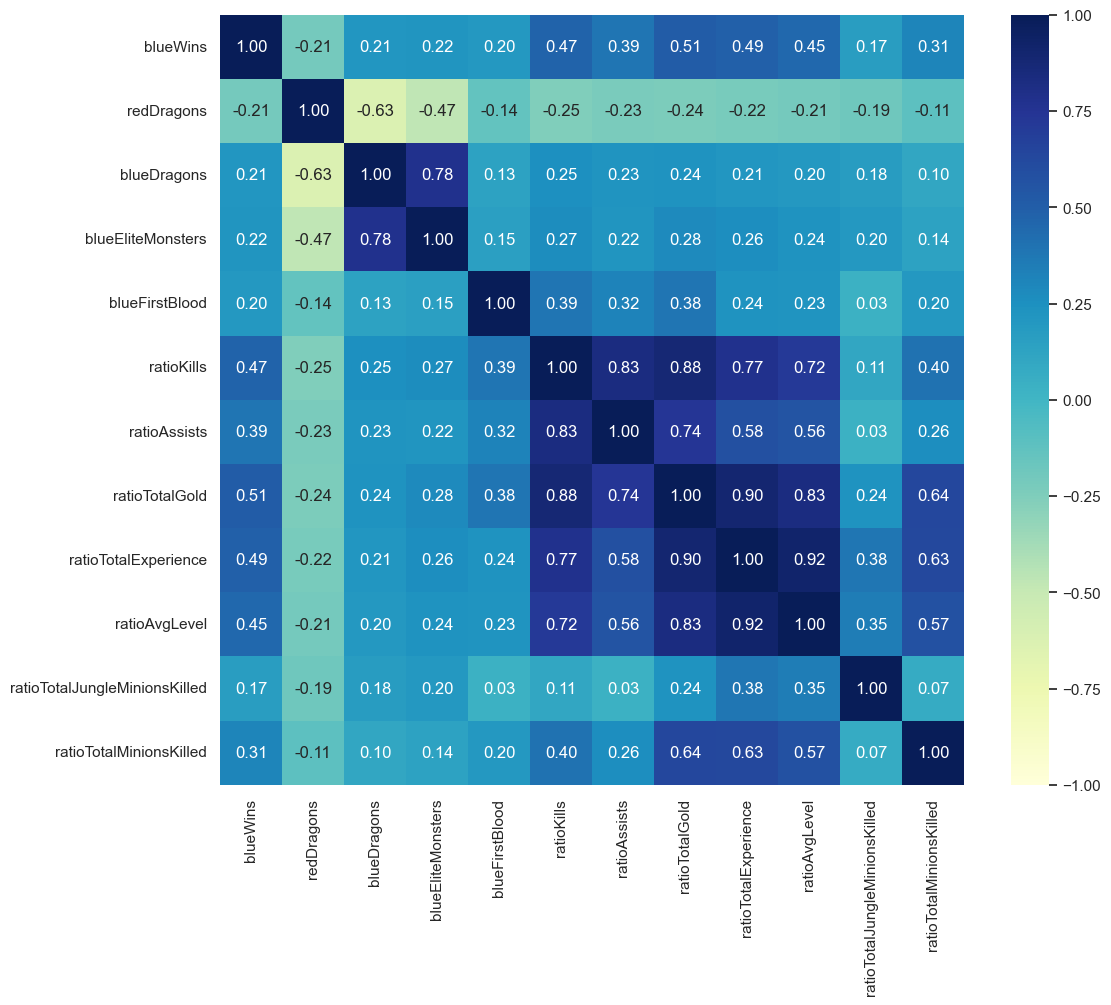

In [11]:
#去除相关性绝对值小于0.1的特征
data4 = data3.drop(['blueHeralds','redHeralds','ratioWardsPlaced','ratioWardsDestroyed'],axis=1)
data4corr = data4.corr()

mp.pyplot.figure(figsize=(12, 10))
sns.heatmap(data4corr, vmin = -1, vmax = 1, fmt = ".2f", cmap='YlGnBu',annot = True)
plt.show()

下面将使用机器学习算法来预测
data3是选出来的数据


In [12]:

from sklearn.model_selection import train_test_split  # 数据集划分
from sklearn.preprocessing import StandardScaler  # 特征标准化
from sklearn.model_selection import GridSearchCV  # 网格搜索
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier  # 集成学习算法
from sklearn.svm import SVC  # 支持向量机算法
from sklearn.naive_bayes import GaussianNB, BernoulliNB  # 朴素贝叶斯算法
from sklearn.neighbors import KNeighborsClassifier  # K近邻算法
from sklearn.linear_model import LogisticRegression  # 逻辑回归算法
from sklearn.tree import DecisionTreeClassifier  # 决策树算法

X=data4.drop(['blueWins'],axis=1)
y=data4['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
def model_train_test(model):
    model.fit(X_train, y_train)
    
    # 预测并输出分类报告
    y_pred = model.predict(X_test)
    #print(classification_report(y_test, y_pred))
    
    # 绘制混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot( cmap="YlGnBu")#参数有camp、ax、values_format、include_values、colorbar、xticks_rotation
    plt.grid(False)
    plt.show()

    # 输出训练集和测试集的准确率
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print("训练集准确率:", train_accuracy)
    print("测试集准确率:", test_accuracy)


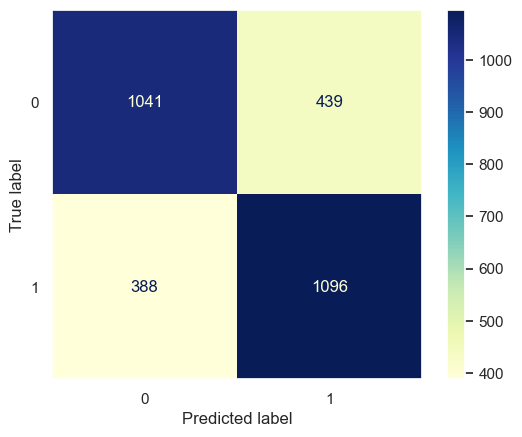

训练集准确率: 0.7284164859002169
测试集准确率: 0.7209851551956815


In [40]:
# adaboost-调参-网格搜索-混淆矩阵
ada = AdaBoostClassifier()
ada_param = {'n_estimators': [5,10,], 'learning_rate': [0.01, 0.1, 1]}
ada_grid = GridSearchCV(ada, ada_param, cv=5, n_jobs=-1)
ada_grid.fit(X_train, y_train)
print("最优参数:", ada_grid.best_params_)
model_train_test(ada_grid.best_estimator_)

{'learning_rate': 0.01, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 300}


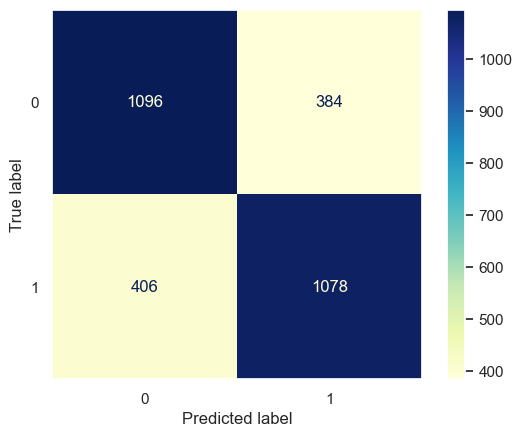

训练集准确率: 0.7352133044107014
测试集准确率: 0.733468286099865


In [41]:
# GradientBoost-调参-网格搜索-混淆矩阵
gbdt = GradientBoostingClassifier()
gbdt_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
   'max_depth': [2, 3, 4],
   'min_samples_split': [2, 3, 4],
 }
gbdt_grid = GridSearchCV(gbdt, gbdt_param_grid, cv=5, n_jobs=-1)
gbdt_grid.fit(X_train, y_train)
print(gbdt_grid.best_params_)
model_train_test(gbdt_grid.best_estimator_)

{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}


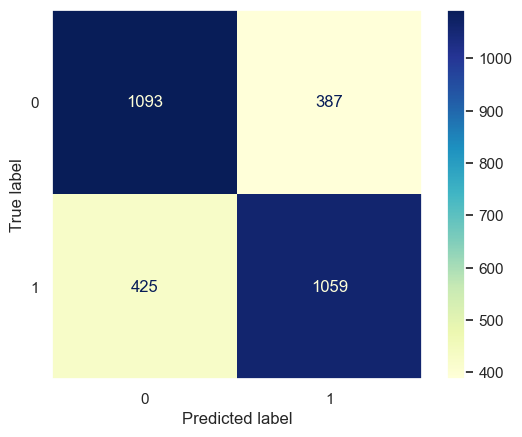

训练集准确率: 0.7328994938539407
测试集准确率: 0.7260458839406208


In [42]:
# RandomForest-调参-网格搜索-混淆矩阵
rf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4],
 }
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
print(rf_grid_search.best_params_)
model_train_test(rf_grid_search.best_estimator_)

{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200}


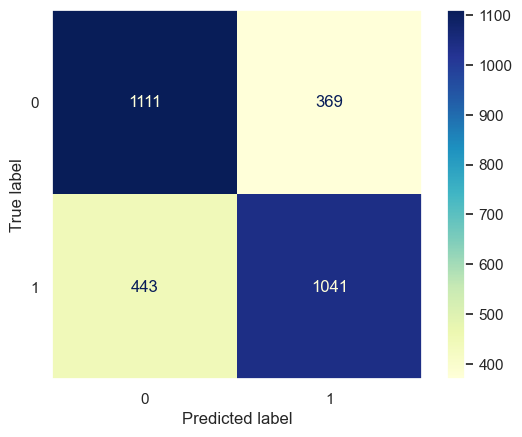

训练集准确率: 0.7232104121475055
测试集准确率: 0.7260458839406208


In [43]:
# ExtraTrees-调参-网格搜索-混淆矩阵
et = ExtraTreesClassifier()
et_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4],
 }
grid_search = GridSearchCV(et, param_grid=et_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model_train_test(grid_search.best_estimator_)

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}


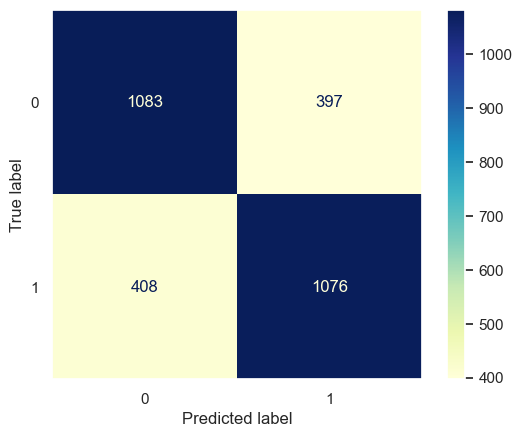

训练集准确率: 0.7307302964569776
测试集准确率: 0.7284075573549258


In [44]:
# SVM-调参-网格搜索-混淆矩阵
svm = SVC()
svm_param = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
svm_grid = GridSearchCV(svm, svm_param, cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)
print(svm_grid.best_params_)
model_train_test(svm_grid.best_estimator_)

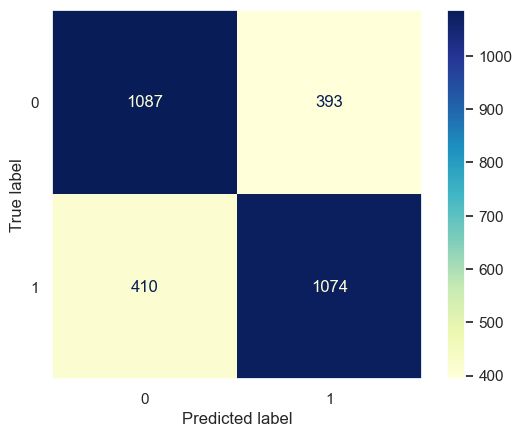

训练集准确率: 0.7265365148228489
测试集准确率: 0.7290823211875843


In [45]:
# Naive Bayes-混淆矩阵
nb = GaussianNB()
model_train_test(nb)

{'n_neighbors': 9}


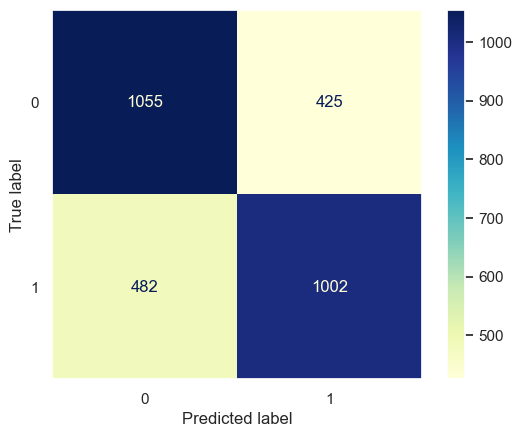

训练集准确率: 0.753000723065799
测试集准确率: 0.6939946018893387


In [46]:
# KNN-调参-网格搜索-混淆矩阵
knn = KNeighborsClassifier()
knn_param = {'n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(knn, knn_param, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)
print(knn_grid.best_params_)
model_train_test(knn_grid.best_estimator_)

{'C': 50, 'penalty': 'l1'}


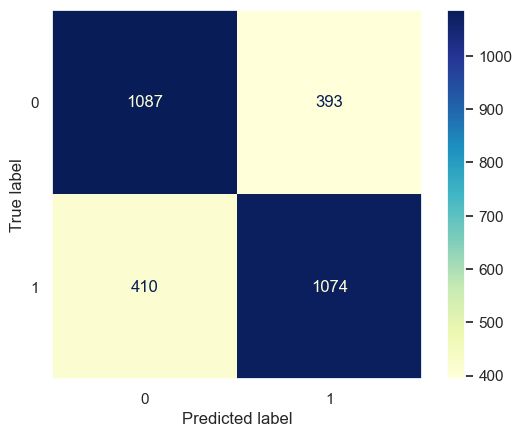

训练集准确率: 0.7327548806941432
测试集准确率: 0.7290823211875843


In [48]:
# Logistic Regression-调参-网格搜索-混淆矩阵
lr = LogisticRegression(solver='liblinear')

# 网格搜索
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10, 50, 100],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model_train_test(grid_search.best_estimator_)


{'max_depth': 2, 'min_samples_split': 2}


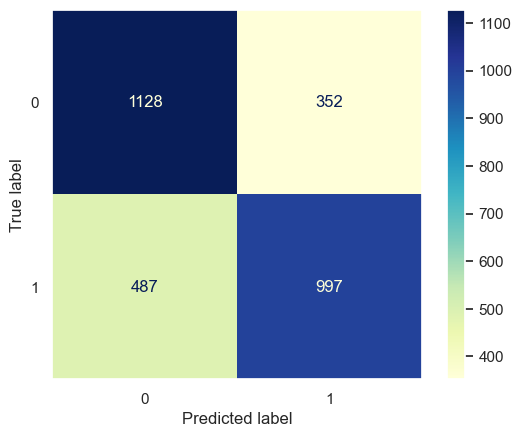

训练集准确率: 0.7274041937816341
测试集准确率: 0.7169365721997301


In [49]:
# 决策树-调参-网格搜索-混淆矩阵
dt = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4],
 }
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
print(dt_grid_search.best_params_)
model_train_test(dt_grid_search.best_estimator_)

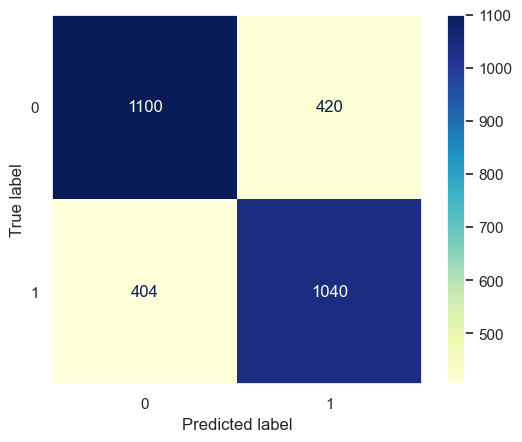

训练集准确率: 0.7326102675343457
测试集准确率: 0.7219973009446694


In [20]:
from sklearn.ensemble import VotingClassifier
# 定义投票分类器
models = [
    GradientBoostingClassifier(learning_rate=0.01, max_depth=2, min_samples_split=2, n_estimators=300),
    SVC(C=1000, gamma=1, kernel='linear'),
    GaussianNB(),
    LogisticRegression(C=50, penalty='l1', solver='liblinear')
]
voting_clf = VotingClassifier(estimators=[('model1', models[0]), ('model2', models[1]), ('model3', models[2]), ('model4', models[3])], voting='hard')

model_train_test(voting_clf)
